In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/lee1613/A-Spec-Data-Analysis/main/38.txt", skiprows = 1, sep ="\t")
df

,Actual Angular Position,Light Intensity Ch A (%max)
0,0.000,97.855
1,0.000,98.050
2,0.000,98.050
3,0.000,98.050
4,0.000,98.050
...,...,...
3922,-0.063,0.000
3923,-0.063,0.488
3924,-0.063,0.000
3925,-0.063,0.488


In [ ]:
rename = {"Actual Angular Position":"Angle(Radius)", "Light Intensity Ch A (%max)":"Light Intensity(%)"}
df.rename(columns = rename,inplace= True)
df

,Angle(Radius),Light Intensity(%)
0,0.000,97.855
1,0.000,98.050
2,0.000,98.050
3,0.000,98.050
4,0.000,98.050
...,...,...
3922,-0.063,0.000
3923,-0.063,0.488
3924,-0.063,0.000
3925,-0.063,0.488


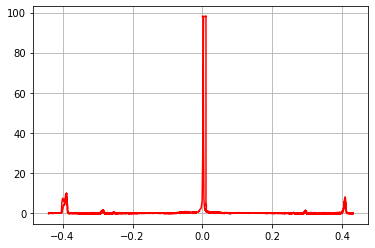

In [ ]:
plt.plot(df["Angle(Radius)"],df["Light Intensity(%)"],c = "r")
plt.grid()

0.01 -7.272e-05
0.00496364


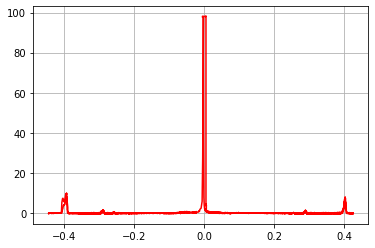

In [ ]:
# Centralised the graph to the centre so that it could be symmetrical along the y axis
angle,light = df["Angle(Radius)"],df["Light Intensity(%)"]
angle1,angle2 = angle[:2000], angle[2001:]
light1,light2 = light[:2000], light[2001:]
print(max(angle[light>50]),min(angle[light>50]))
shift = (max(angle[light>19])+min(angle[light>19]))/2
print(shift)
angle -= shift
plt.plot(angle,light,c = "r")
plt.grid()

In [ ]:
def r2w(radius):
    return 1666e-9*np.sin(radius)
def w2r(wavelength):
    return np.arcsin(wavelength*1e-9/1666e-9)

wavelength = r2w(angle)

0        -8.269390
1        -8.269390
2        -8.269390
3        -8.269390
4        -8.269390
           ...    
1995    186.262339
1996    184.606691
1997    184.606691
1998    182.950859
1999    182.950859
Name: Angle(Radius), Length: 2000, dtype: float64
[ 316  422  472  526  576  735 1019 1075 1149]


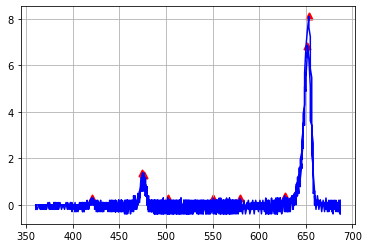

In [ ]:
from scipy.signal import find_peaks
wavelength1 = wavelength[:2000]
print(wavelength1)
wavelength1 = wavelength1[(abs(wavelength1)<=710)&(abs(wavelength)>=360)]
light1 = light[:2000][(abs(wavelength1)<=710)&(abs(wavelength)>=360)]

right_peaks = find_peaks(light1.values,height = 0.25, distance =50, prominence = 0.5)
print(right_peaks[0])
plt.plot(wavelength1,light1,c = "b")
plt.scatter(wavelength1.iloc[right_peaks[0]],light1.iloc[right_peaks[0]], lw=2, color='red', marker = '^')

plt.grid()

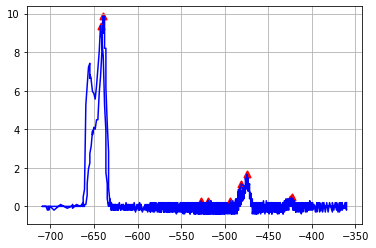

In [ ]:
wavelength2 = wavelength[2001:]
wavelength2 = wavelength2[(abs(wavelength)<=710)&(abs(wavelength)>=360)]
light2 = light[2001:][(abs(wavelength)<=710)&(abs(wavelength)>=360)]

left_peaks = find_peaks(light2.values,height = 0.25, distance =50, prominence = 0.5)
plt.plot(wavelength2,light2,c = "b")
plt.scatter(wavelength2.iloc[left_peaks[0]],light2.iloc[left_peaks[0]], lw=2, color='red', marker = '^')
#plt.xlim(720,385)

plt.grid()

In [ ]:
match = {}
for right in right_peaks[0]:
    for left in left_peaks[0]:
        if abs(wavelength1.iloc[right]+wavelength2.iloc[left])<10:
            match[right] = left


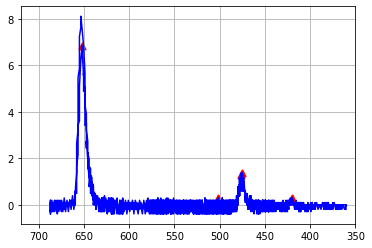

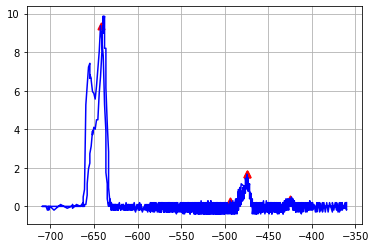

In [ ]:
plt.plot(wavelength1,light1,c = "b")
plt.scatter(wavelength1.iloc[list(match.keys())],light1.iloc[list(match.keys())], lw=2, color='red', marker = '^')
plt.grid()
plt.xlim(720,350)

plt.show()
plt.plot(wavelength2,light2,c = "b")
plt.scatter(wavelength2.iloc[list(match.values())],light2.iloc[list(match.values())], lw=2, color='red', marker = '^')
plt.grid()

In [ ]:
# Do not run this cell multiple times!!!
print(match)
print(wavelength1.iloc[list(match.keys())])
print(wavelength2.iloc[list(match.values())])
match.pop(1019)
match.pop(1075)
print(match)

{316: 750, 576: 328, 1019: 696, 1075: 750, 1149: 896}
958     476.454453
1218    651.894380
1661    501.935050
1717    474.857798
1791    420.299467
Name: Angle(Radius), dtype: float64
3430   -474.741671
2965   -642.571946
3376   -493.870156
3430   -474.741671
3576   -425.016762
Name: Angle(Radius), dtype: float64
{316: 750, 576: 328, 1149: 896}


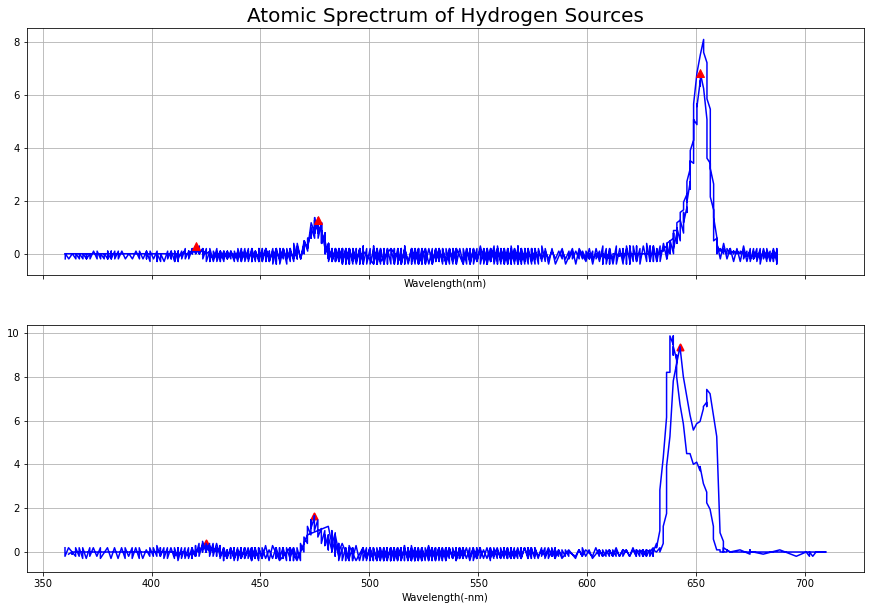

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (15,10),sharex=True)
ax[0].plot(abs(wavelength1),light1,c = "b")
ax[0].plot(abs(wavelength1.iloc[list(match.keys())]),light1.iloc[list(match.keys())], lw=2, color='red',linestyle="", marker = '^',markersize=8)
ax[0].set_xlabel("Wavelength(nm)")
ax[0].set_title("Atomic Sprectrum of Hydrogen Sources",size=20)

ax[0].grid()

ax[1].plot(abs(wavelength2),light2,c = "b")
ax[1].scatter(abs(wavelength2).iloc[list(match.values())],light2.iloc[list(match.values())], lw=2, color='red', marker = '^')
ax[1].set_xlabel("Wavelength(-nm)")

plt.grid()

In [ ]:
r_spectrum = np.array(wavelength1.iloc[list(match.keys())])
r_sp_intensity = np.array(light1.iloc[list(match.keys())])
r_sp_radius = w2r(r_spectrum)

l_spectrum = np.array(wavelength2.iloc[list(match.values())])
l_sp_intensity = np.array(light2.iloc[list(match.values())])
l_sp_radius = w2r(l_spectrum)

print((r_spectrum-l_spectrum)/2)
print((r_sp_intensity+l_sp_intensity)/2)
print((r_sp_radius-l_sp_radius)/2)

[475.59806195 647.23316295 422.65811496]
[1.465  8.1055 0.342 ]
[0.2895 0.399  0.2565]
